In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics

In [5]:
from imblearn.under_sampling import NearMiss

In [6]:
# houston rainfall 
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

# df = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15])

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [7]:
# ithaca data from NOAA 
df = pd.read_csv('datasets/daily_houston_data.csv')

In [8]:
# df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))
#only for houston rainfall dataset 

In [9]:
df.describe().T #measures of spread 

,count,mean,std,min,25%,50%,75%,max
temperature,6574.0,21.195097,7.069661,-7.727500,16.304479,22.602500,27.220521,33.047083
dewpoint_temperature,6574.0,15.564709,7.979328,-14.060833,10.241458,18.071667,22.294896,26.029583
relative_humidity,6574.0,0.729901,0.115577,0.209583,0.669167,0.749583,0.811667,0.982083
wind_speed,6574.0,3.291232,1.268191,0.799583,2.331250,3.056875,4.059688,12.825417
cloud_cover,6574.0,0.542272,0.316828,0.000000,0.267500,0.564167,0.823750,1.000000
precipitation,6574.0,3.037556,8.711440,0.000000,0.000000,0.000000,0.000000,155.960000
rain_tomorrow,6574.0,0.231974,0.422125,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
print(df.describe())

       temperature  dewpoint_temperature  relative_humidity   wind_speed  \
count  6574.000000           6574.000000        6574.000000  6574.000000   
mean     21.195097             15.564709           0.729901     3.291232   
std       7.069661              7.979328           0.115577     1.268191   
min      -7.727500            -14.060833           0.209583     0.799583   
25%      16.304479             10.241458           0.669167     2.331250   
50%      22.602500             18.071667           0.749583     3.056875   
75%      27.220521             22.294896           0.811667     4.059688   
max      33.047083             26.029583           0.982083    12.825417   

       cloud_cover  precipitation  rain_tomorrow  
count  6574.000000    6574.000000    6574.000000  
mean      0.542272       3.037556       0.231974  
std       0.316828       8.711440       0.422125  
min       0.000000       0.000000       0.000000  
25%       0.267500       0.000000       0.000000  
50%      

AttributeError: module 'matplotlib' has no attribute 'colors'

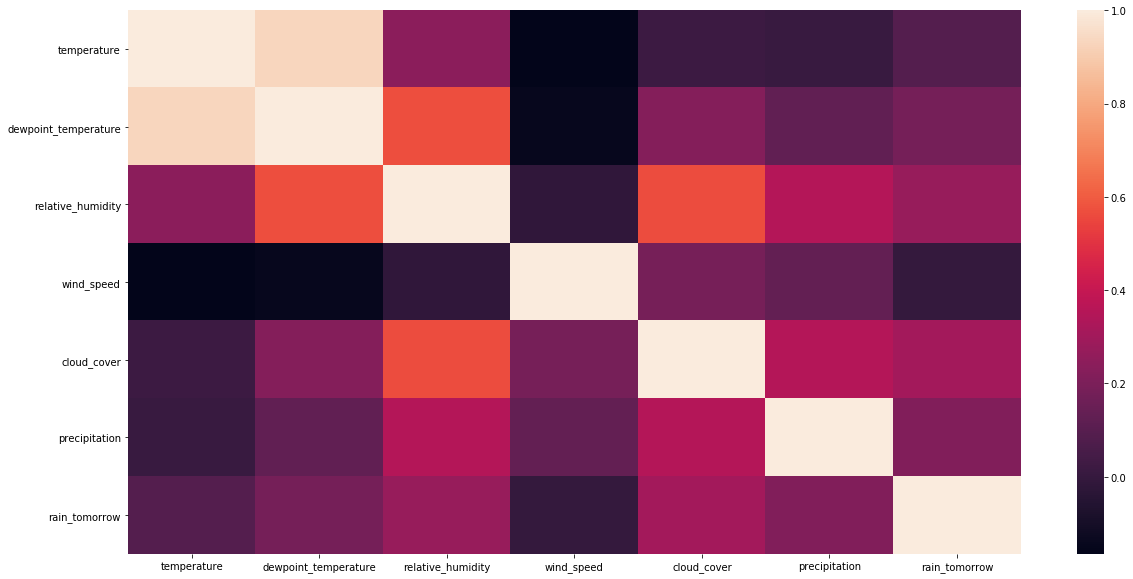

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

observations: 
- max_temp and temp_9am have high correlation 
- min_temp and temp_9am have high correlation
- pressure_9am ad pressure_3pm have high positive correlation 
- rainfall seems to have the highes positive correlation with humidity_3pm (.29), 
followed by rainfall and then humidity_9am  

In [ ]:
# TODO: plot distributions: 


In [ ]:
# end data analysis and visualization 


In [ ]:
#option 2: split by year: 

# year = pd.to_datetime(df.Date).dt.year

# train = df[year < 2015]
# validate = df[year == 2015]
# test = df[year > 2015]

Random Forest 

Decision Tree: 
supervised learning method that can be used for classification and regression. 
Random Forest: 
made up of individual decision trees, and the tree in the forest that gets the most
votes becomes the prediction of the model 



In [ ]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [ ]:
# input_cols = [
#                 'min_temp', 
#                 'max_temp', 
#                 'wind_speed9am', 
#                 'wind_speed3pm', 
#                 'humidity9am', 
#                 'humidity3pm', 
#                 'pressure9am', 
#                 'pressure3pm', 
#                 'temp9am', 
#                 'temp3pm',
#                 'rainfall']

input_cols = [
                'temperature',
                'dewpoint_temperature',
                'relative_humidity',
                'cloud_cover',  
                'precipitation',
                'wind_speed'
                ]
target_col = ['rain_tomorrow'] #yes/no will it rain tomorrow 

In [ ]:
x_val = validate[input_cols].copy()
y_val = validate[['rain_tomorrow']].copy()

In [ ]:
x_train = train[input_cols].copy()
y_train = train[['rain_tomorrow']].copy()

In [ ]:
x_test = test[input_cols].copy()
y_test = test[['rain_tomorrow']].copy()

We have a problem where we our data is around 80% no, and 20% no. This causes an imbalance for a false high accuracy by simply predicting No more than Yes. Here we show the imbalance of no/yes's for rain_tomorrow. 

In [ ]:
df['rain_tomorrow'].value_counts()

0    5049
1    1525
Name: rain_tomorrow, dtype: int64

In [ ]:
#option 1: using nearMidd 
# poopoo 
# nm = NearMiss()
# x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [ ]:
#option 2:  random undersampler 
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)

In [ ]:
x_train = x_train_resampled
y_train = y_train_resampled

Now we check to see if our samples are resized correctly by the minority class. 

In [ ]:
y_train['rain_tomorrow'].value_counts()

0    3063
1    3063
Name: rain_tomorrow, dtype: int64

Now we scale the numeric columns to standardize our data. 
Otherwise, our would weigh higher values greater than smaller values regardless of unit without scaling. 


In [ ]:
scaler = MinMaxScaler().fit(df[input_cols])

x_val[input_cols] = scaler.transform(x_val[input_cols])
x_test[input_cols] = scaler.transform(x_test[input_cols])
x_train[input_cols] = scaler.transform(x_train[input_cols])

Verify that our data has been rescaled. 

In [ ]:
x_val.describe().loc[['min', 'max']]

,temperature,dewpoint_temperature,relative_humidity,cloud_cover,precipitation,wind_speed
min,0.057307,0.092333,0.132686,0.0,0.000000,0.00000
max,1.000000,0.987975,1.000000,1.0,0.733521,0.68041


In [ ]:
# model = RandomForestClassifier(n_estimators = 100) 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
x_pred_train = model.predict(x_train)


In [ ]:
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))

Training Accuracy Score: 100.00


In [ ]:
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100)) 

Validation Accuracy Score: 69.66


In [ ]:
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Test Accuracy Score: 70.11


In [ ]:
y_val['rain_tomorrow'].value_counts() 


0    998
1    317
Name: rain_tomorrow, dtype: int64

In [ ]:
# print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_val) * 100))


100% training accuracy means our model is possibly just memorizing the inputs, and since our validation score is so much lower, we have a case of overfitting. 

One way of addressing this is to reduce the max depth of the tree (TODO: add explanation here of how this helps overfitting)

In [ ]:
dtree= DecisionTreeClassifier(max_depth =5 , random_state=42)

dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

we will tune max depth later. 

In [ ]:
print('Training Accuracy Score: {:.2f}'.format(dtree.score(x_train,y_train)*100))

Training Accuracy Score: 73.26


In [ ]:
print('Validation Accuracy Score: {:.2f}'.format(dtree.score(x_val,y_val)*100)) 

Validation Accuracy Score: 72.40


In [ ]:
print('Test Accuracy Score: {:.2f}'.format(dtree.score(x_test,y_test)*100))

Test Accuracy Score: 71.41


Our validation score more closesly matches our accuracy, which means we are no longer overfitting to our training data. 

In [ ]:
tree_pred = dtree.predict(x_test)

In [ ]:
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, tree_pred) * 100))


F1 Score: 47.92


Plot the tree

[Text(0.5, 0.875, 'cloud_cover <= 0.638\ngini = 0.5\nsamples = 6126\nvalue = [3063, 3063]'),
 Text(0.25, 0.625, 'precipitation <= 0.022\ngini = 0.436\nsamples = 2887\nvalue = [1959, 928]'),
 Text(0.125, 0.375, 'cloud_cover <= 0.283\ngini = 0.4\nsamples = 2573\nvalue = [1861, 712]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'dewpoint_temperature <= 0.791\ngini = 0.429\nsamples = 314\nvalue = [98, 216]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'precipitation <= 0.03\ngini = 0.449\nsamples = 3239\nvalue = [1104, 2135]'),
 Text(0.625, 0.375, 'cloud_cover <= 0.892\ngini = 0.491\nsamples = 1870\nvalue = [810, 1060]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'dewpoint_temperature <= 0.84\ngini = 0.337\nsamples = 1369\nvalue = [294, 1075]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

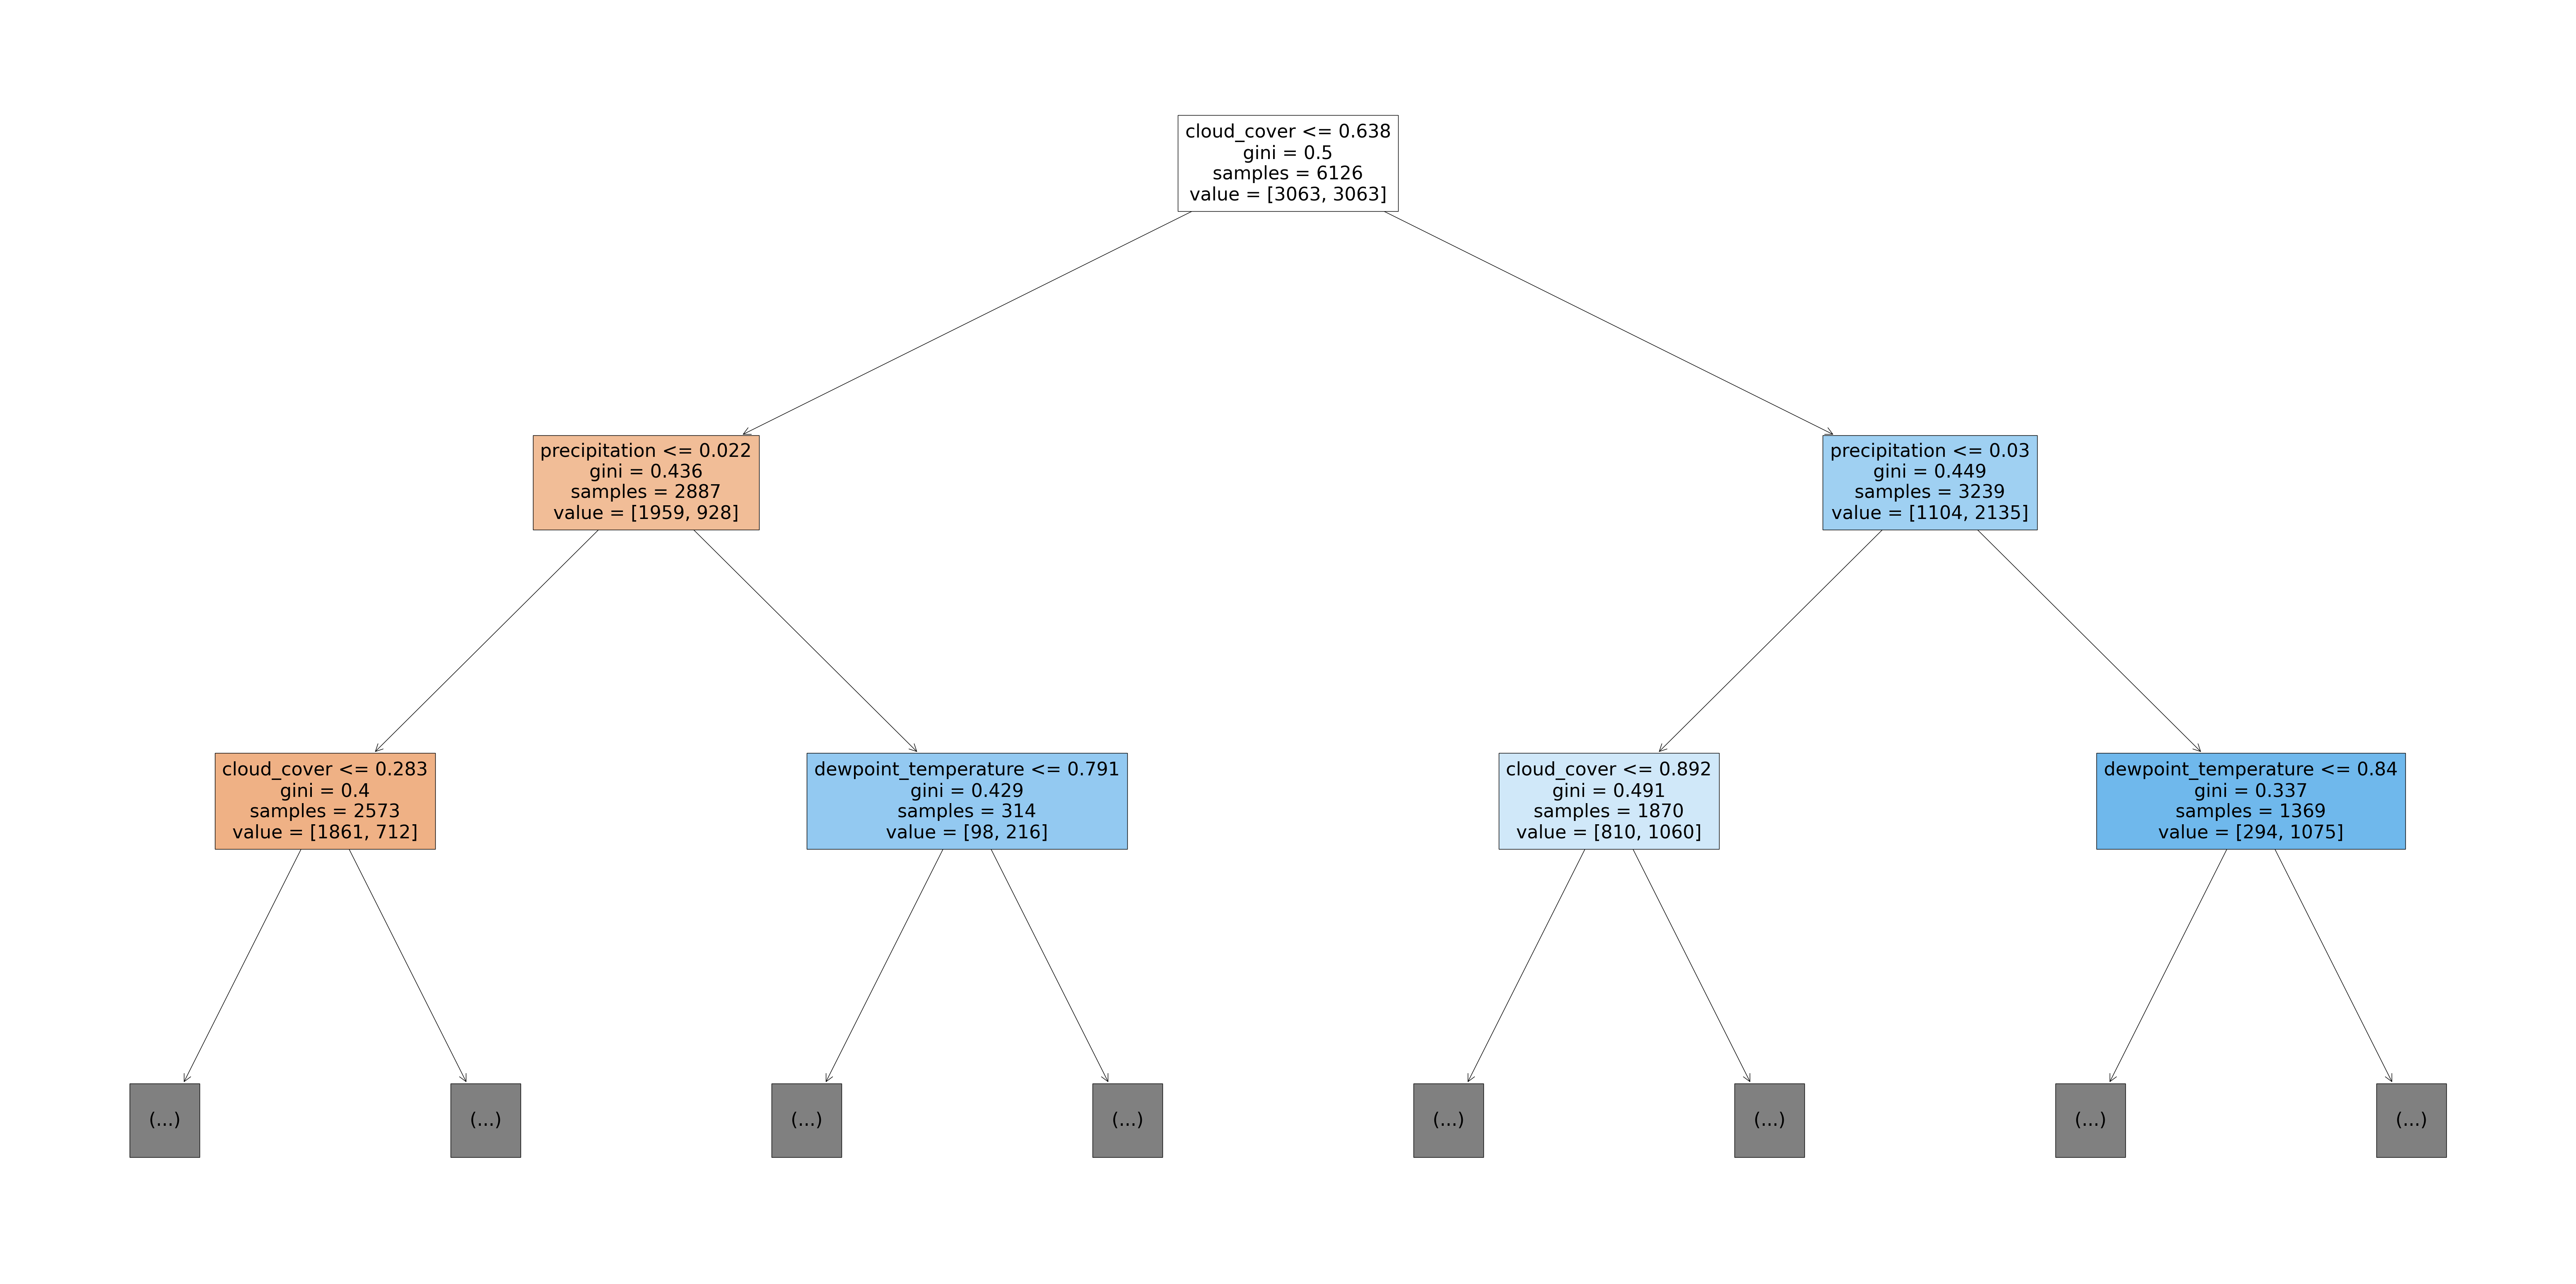

In [ ]:
plt.figure(figsize=(80,40))
plot_tree(dtree, feature_names=x_train.columns, max_depth=2, filled=True)

Now we want to see feature importance. 

In [ ]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)


,feature,importance
3,cloud_cover,0.304597
5,wind_speed,0.198298
1,dewpoint_temperature,0.146034
0,temperature,0.134333
2,relative_humidity,0.119488
4,precipitation,0.097250


We see that Humidity_3pm was the most important feature by a good margin. TODO: does this follow with our expectations at the beginning when looking into coeffs? 

Now back to hyperparameter tuning - to reduce overfitting, we were going to tune max_depth

In [ ]:
model.tree_.max_depth


30

In [ ]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(1, 24):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)


  print('Scores for max_depth {}'.format(i))
  print('Training Accuracy Score: {:.2f}'.format(train_score))
  print('Validation Accuracy Score: {:.2f}'.format(validation_score))
  print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))
  print()

Scores for max_depth 1
Training Accuracy Score: 66.83
Validation Accuracy Score: 64.33
Test Accuracy Score: 62.13

Scores for max_depth 2
Training Accuracy Score: 68.76
Validation Accuracy Score: 63.12
Test Accuracy Score: 61.98

Scores for max_depth 3
Training Accuracy Score: 69.49
Validation Accuracy Score: 72.62
Test Accuracy Score: 71.79

Scores for max_depth 4
Training Accuracy Score: 71.81
Validation Accuracy Score: 74.30
Test Accuracy Score: 72.40

Scores for max_depth 5
Training Accuracy Score: 73.26
Validation Accuracy Score: 72.40
Test Accuracy Score: 71.41

Scores for max_depth 6
Training Accuracy Score: 74.70
Validation Accuracy Score: 72.62
Test Accuracy Score: 70.80

Scores for max_depth 7
Training Accuracy Score: 76.92
Validation Accuracy Score: 67.68
Test Accuracy Score: 67.53

Scores for max_depth 8
Training Accuracy Score: 79.04
Validation Accuracy Score: 68.14
Test Accuracy Score: 69.35

Scores for max_depth 9
Training Accuracy Score: 80.93
Validation Accuracy Score:

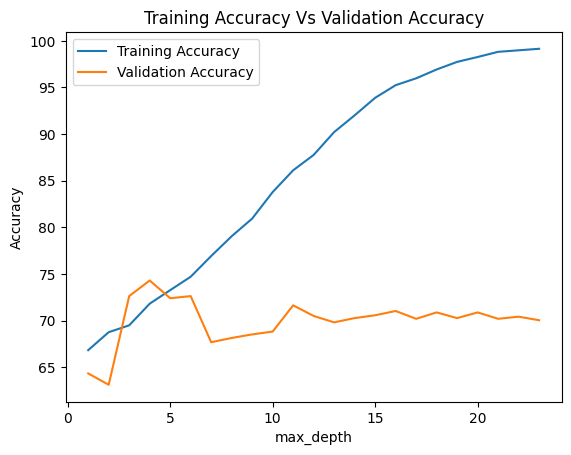

In [ ]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

It would seem that validation accuracy stabilizes around a max_depth of 8. TODO: interpret results. Explain why validation might dip around 6-7? 

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 71.81
Validation Accuracy Score: 74.30
Test Accuracy Score: 72.40


Now we'll try tuning the max_leaf_nodes. 
the Gini impurity is how often a randomly chosen element is incorrectly classified. 
Insetad of finding the best split layer by layer, it'll look at all possible splits and only split the node with the lower gini value regardless of the level. 

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 73.07
Validation Accuracy Score: 71.94
Test Accuracy Score: 70.04


In [ ]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(2, 100):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)


  
# print('Scores for max_leaf_nodes {}'.format(i))
# print('Training Accuracy Score: {:.2f}'.format(train_score))
# print('Validation Accuracy Score: {:.2f}'.format(validation_score))
# print('Max Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))
# print()

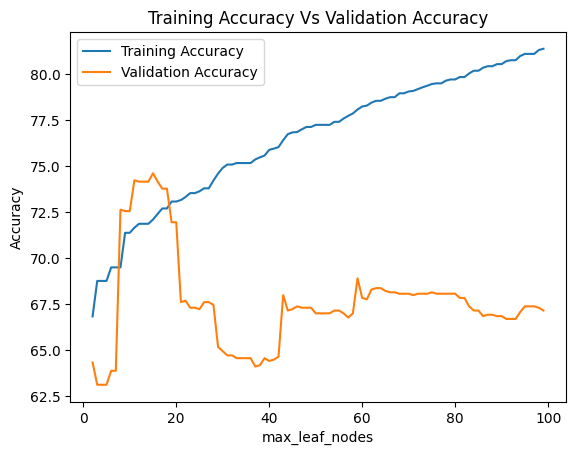

In [ ]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

It would appear our best max_leaf_nodes is at 45-47.

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

test_pred = model.predict(x_test)
print('F-1 Score:{:.2f}'.format(metrics.f1_score(y_test, test_pred)*100))

Training Accuracy Score: 72.09
Validation Accuracy Score: 74.60
Test Accuracy Score: 71.94
F-1 Score:48.39


Now if we combine our tuned max_depth and max_leaf_nodes

In [ ]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(2, 12):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_depth = i, max_leaf_nodes=15, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)

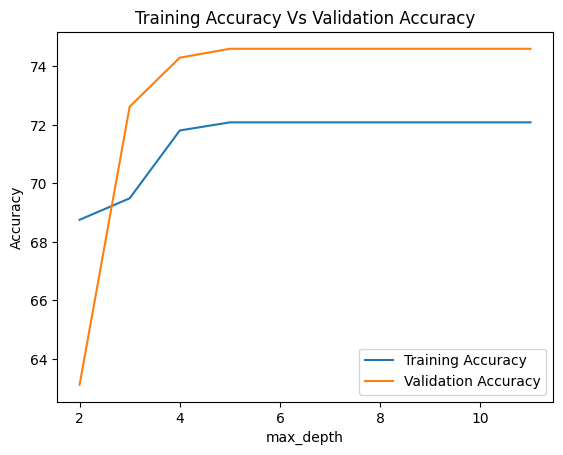

In [ ]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=5, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 72.09
Validation Accuracy Score: 74.60
Test Accuracy Score: 71.94


After tuning, our optimal hyperparameters are max_depth=8 and max_leaf_nodes=48

Comparing the new scores with old baseline scores

In [ ]:
# insert code for comparing old and new scores 

Now we'll use random forest 

In [ ]:
rforest = RandomForestClassifier(random_state=24,n_jobs=-1)
rforest.fit(x_train, y_train)

y_pred_forest = rforest.predict(x_test)


c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print('Training Accuracy Score: {:.2f}'.format(rforest.score(x_train,y_train)*100))

Training Accuracy Score: 100.00


In [ ]:
print('Validation Accuracy Score: {:.2f}'.format(rforest.score(x_val,y_val)*100))

Validation Accuracy Score: 75.59


In [ ]:
print('Test Accuracy Score: {:.2f}'.format(rforest.score(x_test,y_test)*100))

Test Accuracy Score: 74.68


## RANDOM FOREST REGRESSION

In [ ]:
input_cols_regression = input_cols.copy()
input_cols_regression.remove("precipitation")

x_train_regression = x_train[input_cols_regression]
y_train_regression = x_train[["precipitation"]]

x_val_regression = x_val[input_cols_regression]
y_val_regression = x_val[["precipitation"]]

x_test_regression = x_test[input_cols_regression]
y_test_regression = x_test[["precipitation"]]

In [ ]:
rforestRegressoin = RandomForestRegressor(random_state=24)
rforestRegressoin.fit(x_train_regression, y_train_regression)



c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print('Training Accuracy Score: {:.2f}'.format(rforestRegressoin.score(x_train_regression,y_train_regression)*100))

Training Accuracy Score: 97.00


In [ ]:
print('Validation Accuracy Score: {:.2f}'.format(rforestRegressoin.score(x_val_regression,y_val_regression)*100))

Validation Accuracy Score: 37.43


In [ ]:
print('Test Accuracy Score: {:.2f}'.format(rforestRegressoin.score(x_test_regression,y_test_regression)*100))

Test Accuracy Score: 29.81


Conclusion: TODO